In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Mean Squared Error: 0.0249
Mean Absolute Error: 272.6110
R-squared: 0.9751
b0 = 3.469202702888992e-16
b1 = 0.060484694322210014
b2 = 0.0002925185154627096
b3 = 0.24238057040946706
b4 = 0.3409497813279204
b5 = -0.00019635801099584057
b6 = 0.3761620138278682
b7 = 0.20503059405024415
b8 = -0.00046650836764166914
b9 = 0.3000788885599851
b10 = 0.10440195523324873
b11 = 0.0003648848097210078
b12 = 0.0001346599816092725
b13 = 0.35335459095686717
b14 = 0.3070462671746114
b15 = -0.0006583436519777221
b16 = 0.24452935673534631
b17 = 0.014682256940478354
b18 = 0.20969606800873566
b19 = 0.19125617549278945
b20 = 0.3221254416362462
b21 = 0.04487441906343479
b22 = 0.0005372804029576124
b23 = 0.04891084360445562
b24 = 0.22813421189394703
b25 = 0.0003731212800654284


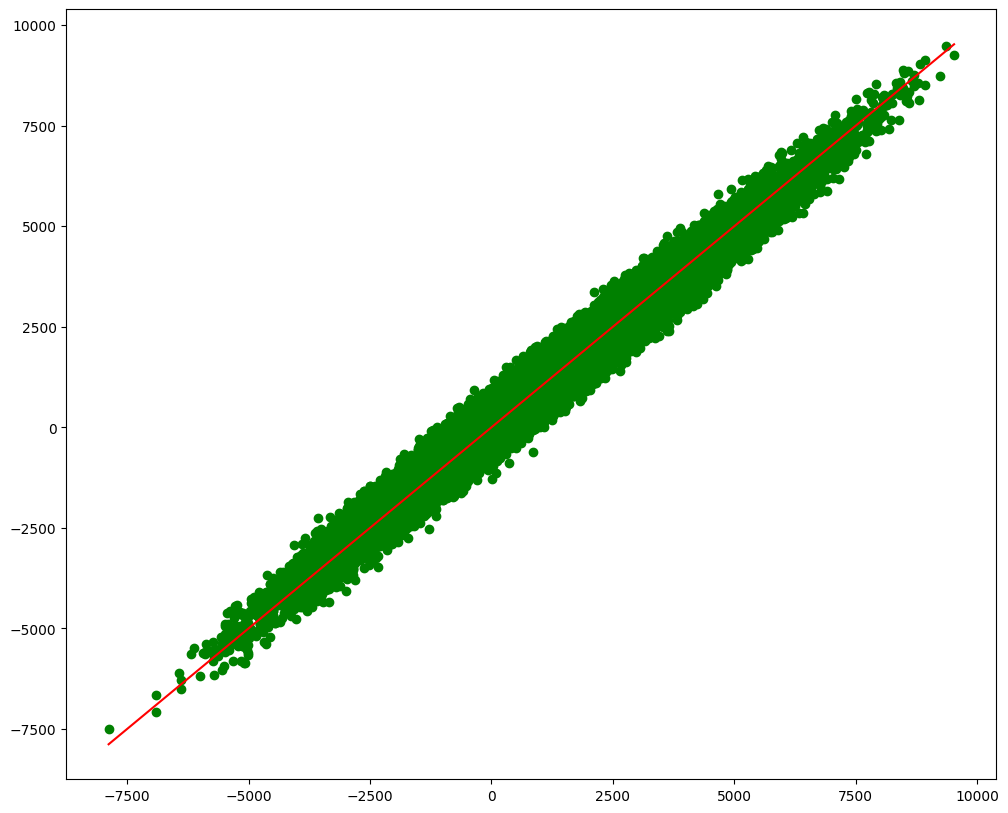

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/linear_regression_train.csv')

x_n = data[[f'Feature_{i}' for i in range(1, 26)]].values
y = data['Target'].values

x_mean = np.mean(x_n, axis=0)
x_std = np.std(x_n, axis=0)
x_n = (x_n - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y = (y - y_mean) / y_std
#n = 25 #number of independent variable
#here i is b_i like b1,b2,b3
b_n = np.zeros(26)

iterations = 10000

learning_rate = 1e-2


N = len(x_n)



for j in range(iterations):
    z = b_n[0] + np.dot(x_n, b_n[1:])

    mse = np.mean((y - z) ** 2)
    b_n[0] -= learning_rate * -2 * np.sum(y - z) / len(x_n)
    for o in range(1, 26):
        b_n[o] -= learning_rate * -2 * np.sum((y - z)*x_n[:, o-1]) / len(x_n)


z = b_n[0] + np.dot(x_n, b_n[1:])
#e = np.sum(y - (b_n[0] + sum(b_n[i + 1] * x_n[:, 0] for i in range(25))))
mse = np.mean((y - z) ** 2)
z = z * y_std + y_mean
y_A = y * y_std + y_mean

mae = np.mean(np.abs(y_A - z))

ss_res = np.sum((y_A - z) ** 2)
ss_tot = np.sum((y_A - np.mean(y_A)) ** 2)
r2 = 1 - (ss_res / ss_tot)



print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R-squared: {r2:.4f}')

for i in range (26):
    print(f'b{i} = {b_n[i]}')

#cost curve
#learn weight and dataset obesrvation

plt.figure(figsize=(12, 10))
plt.scatter(y_A, z, color='green')
plt.plot([y_A.min(), y_A.max()], [y_A.min(), y_A.max()], color='red')
plt.show()








# New Section

# New Section

Mean Squared Error: 116085.8506


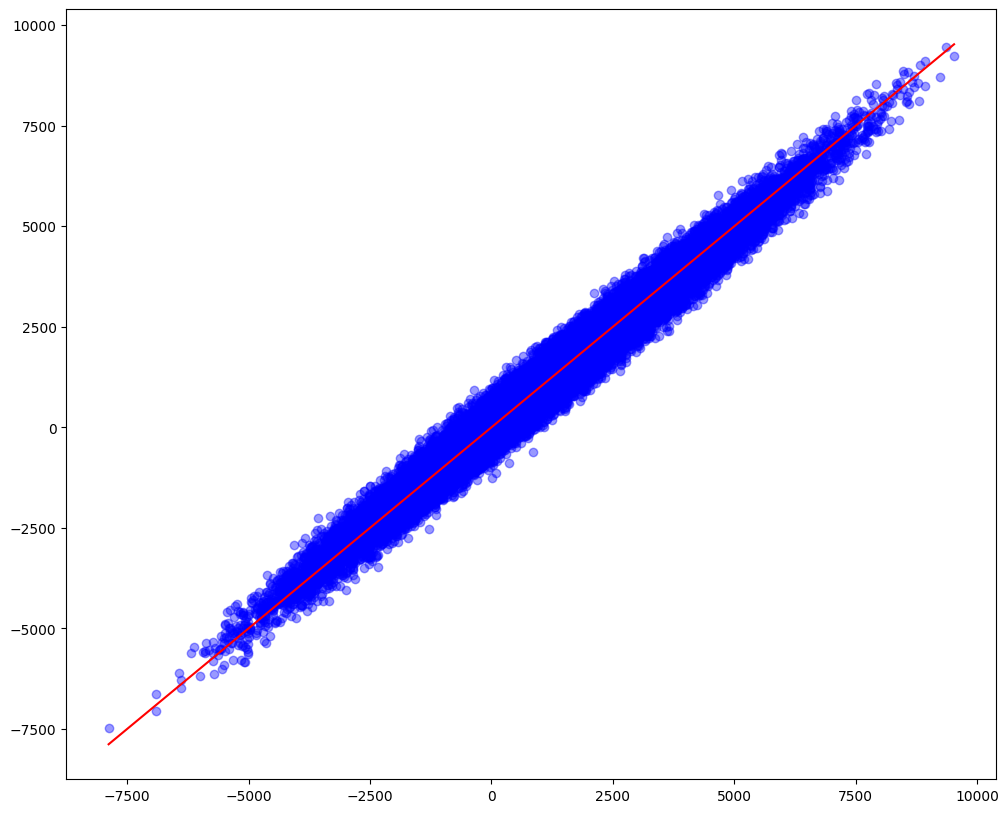

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#same thing just for calculating actual mse

data = pd.read_csv('/content/drive/MyDrive/linear_regression_train.csv')
x_n = data[[f'Feature_{i}' for i in range(1, 26)]].values
y = data['Target'].values


x_mean = np.mean(x_n, axis=0)
x_std = np.std(x_n, axis=0)
x_n = (x_n - x_mean) / x_std

y_mean = np.mean(y)
y_std = np.std(y)
y = (y - y_mean) / y_std


b_n = np.zeros(26)
learning_rate = 1e-3
iterations = 3000


for j in range(iterations):
    z = b_n[0] + np.dot(x_n, b_n[1:])


    b_n[0] -= learning_rate * (-2 * np.sum(y - z) / len(x_n))
    b_n[1:] -= learning_rate * (2 * np.dot(x_n.T, (z - y)) / len(x_n))


z = b_n[0] + np.dot(x_n, b_n[1:])
z = z * y_std + y_mean
y_A = y * y_std + y_mean

mse = np.mean((y_A - z) ** 2)
print(f'Mean Squared Error: {mse:.4f}')

plt.figure(figsize=(12, 10))
plt.scatter(y_A, z, alpha=0.4, color='blue')
plt.plot([y_A.min(), y_A.max()], [y_A.min(), y_A.max()], color='red')
plt.show()

polynomial wala part
but single variable so we have to add m

What is the degree: 3
b0 = 0.0
b1 = 7.512004478143287e-10
b2 = 3.6260530370184616e-09
b3 = 4.952265267351302e-10
b4 = 6.619018486231666e-11
b5 = -1.8892351540958076e-09
b6 = 4.30887027771266e-11
b7 = 7.575949574612245e-10
b8 = 7.749884648913977e-10
b9 = 7.797996839508088e-10
b10 = 4.021474306608445e-10
b11 = -3.9828852309492563e-10
b12 = 4.121037414625944e-10
b13 = -1.4863800670265585e-10
b14 = -2.366567385191185e-09
b15 = 3.6680093111031577e-10
final mse is 8.680888928059328e-17


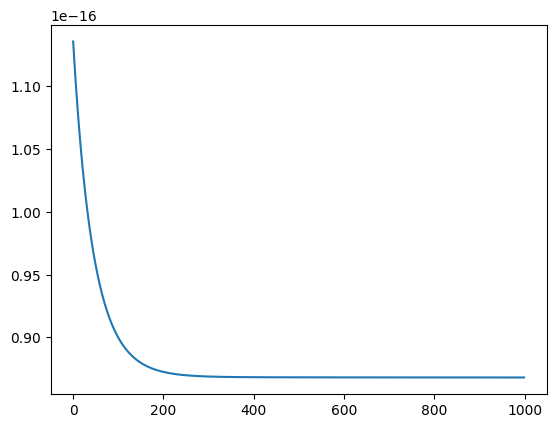

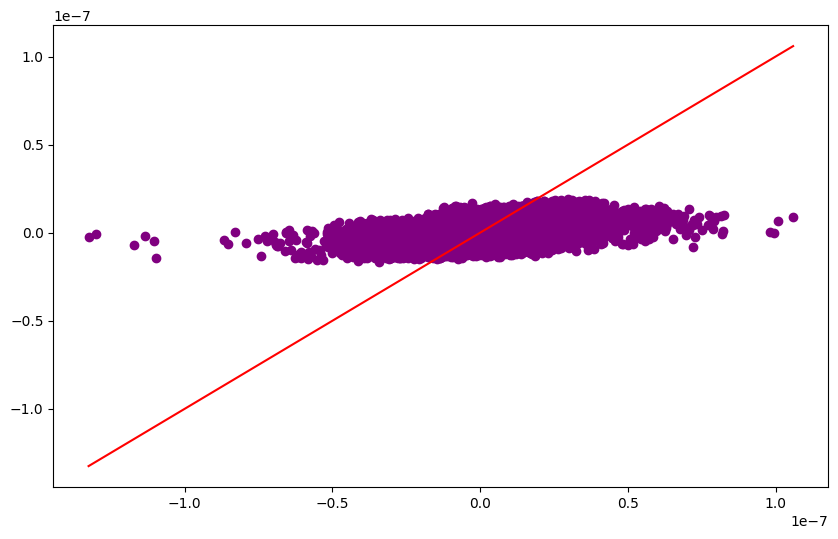

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/polynomial_regression_train.csv')

Feature_1 = data['Feature_1'].values
Feature_2 = data['Feature_2'].values
Feature_3 = data['Feature_3'].values
Feature_4 = data['Feature_4'].values
Feature_5 = data['Feature_5'].values
Target = data['Target'].values

x_n = {'x1': Feature_1, 'x2': Feature_2, 'x3': Feature_3, 'x4': Feature_4, 'x5': Feature_5}
y = Target


iteration = 1000
learning_rate = 1e-2
m = len(Feature_1)

n = int(input('What is the degree '))

X = []
for key in x_n:
    for r in range(1, n + 1):
        X.append(np.power(x_n[key], r))

X = np.array(X).T
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Now we have created matrix X fully without interaction terms

def normalize(X):
    return (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-8)

X = normalize(X)



b_n = np.zeros(X.shape[1])

def gradient(X, y, b_n):
    return (-1 / m) * np.dot(X.T, (y - np.dot(X, b_n)))


def mean_squared_error(y, y_pred):
    return (1 / m) * np.sum((y - y_pred) ** 2)

mse_values = []

for j in range(iteration):
    grad = gradient(X, y, b_n)
    b_n -= learning_rate * grad

    y_pred = np.dot(X, b_n)


    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)


mse_final = mean_squared_error(y, y_pred)

for i in range (5*n+1):
    print(f'b{i} = {b_n[i]}')

print(f'mse = {mse_final}')

plt.plot(range(iteration), mse_values)
plt.show()


y_pred = np.dot(X, b_n)


plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.show()






What is the degree: 10
b0 = 0.0
b1 = 8.191873079830782e-10
b2 = 8.834428418126029e-10
b3 = 3.687993440032483e-10
b4 = 9.18147463019667e-10
b5 = 1.223302521374027e-10
b6 = 8.365501362446173e-10
b7 = -7.760783880849027e-12
b8 = 7.28505108431855e-10
b9 = -7.440634388151665e-11
b10 = 6.164955641299503e-10
b11 = 1.1143751159679267e-10
b12 = 3.0086448234662453e-10
b13 = -8.451963288970294e-12
b14 = -3.5431413152710304e-10
b15 = 1.238996095856297e-12
b16 = -6.580412498764938e-10
b17 = 1.6225258365203696e-11
b18 = -7.796747271528931e-10
b19 = 2.0447610867255572e-11
b20 = -8.087919665119655e-10
b21 = 7.765374885500149e-10
b22 = 4.286830282422371e-10
b23 = 4.622163197949686e-10
b24 = 2.355301985437695e-10
b25 = 2.1988162225609955e-10
b26 = 1.1453429008514479e-10
b27 = 4.6737470805071896e-11
b28 = 3.6129584321665493e-11
b29 = -7.559400127626378e-11
b30 = -1.6744024408964294e-11
b31 = 4.6190099843869146e-10
b32 = -2.36793158304982e-10
b33 = 2.3613664529435736e-10
b34 = -1.1078751951498076e-10
b35 

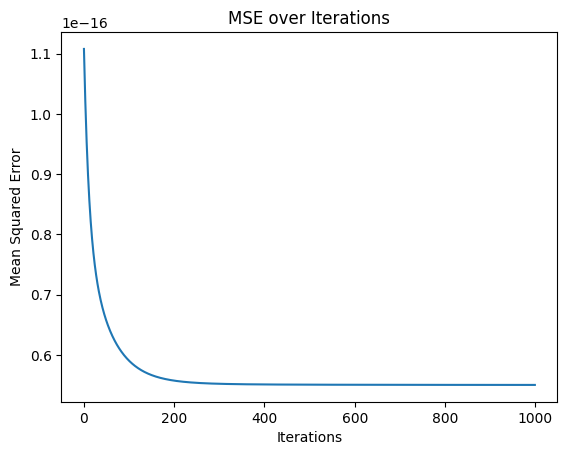

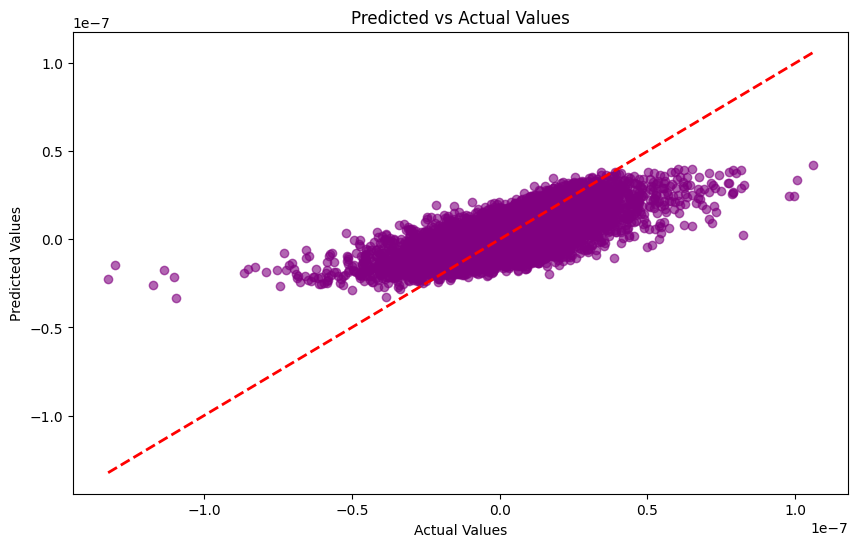

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('/content/drive/MyDrive/polynomial_regression_train.csv')

Feature_1 = data['Feature_1'].values
Feature_2 = data['Feature_2'].values
Feature_3 = data['Feature_3'].values
Feature_4 = data['Feature_4'].values
Feature_5 = data['Feature_5'].values
Target = data['Target'].values

x_n = {'x1': Feature_1, 'x2': Feature_2, 'x3': Feature_3, 'x4': Feature_4, 'x5': Feature_5}
y = Target

iteration = 1000
learning_rate = 1e-2
m = len(Feature_1)

n = int(input('What is the degree: '))

# polynomial terms
X_poly = []
for key in x_n:
    for r in range(1, n + 1):
        X_poly.append(np.power(x_n[key], r))

# interaction terms
X_interaction = []
keys = list(x_n.keys())
for i in range(len(keys)):
    for j in range(i + 1, len(keys)):  # To have all patterns once All not repeat
        X_interaction.append(x_n[keys[i]] * x_n[keys[j]])


X = np.array(X_poly + X_interaction).T
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Normalize
def normalize(X):
    return (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-8)

X = normalize(X)

b_n = np.zeros(X.shape[1])


def gradient(X, y, b_n):
    return (-1 / m) * np.dot(X.T, (y - np.dot(X, b_n)))


def mean_squared_error(y, y_pred):
    return (1 / m) * np.sum((y - y_pred) ** 2)

mse_values = []

for j in range(iteration):
    grad = gradient(X, y, b_n)
    b_n -= learning_rate * grad

    y_pred = np.dot(X, b_n)
    mse = mean_squared_error(y, y_pred)
    mse_values.append(mse)


mse_final = mean_squared_error(y, y_pred)


for i in range(X.shape[1]):
    print(f'b{i} = {b_n[i]}')

print(f'Final MSE: {mse_final}')

mae = np.mean(np.abs(y - y_pred))

ss_total = np.sum((y - np.mean(y)) ** 2)
ss_residual = np.sum((y - y_pred) ** 2)
r2 = 1 - (ss_residual / ss_total)

print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

plt.plot(range(iteration), mse_values)
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE over Iterations')
plt.show()


plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='purple')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted ')
plt.title('Predicted vs Actual ')
plt.show()


K mean clustering

Binary **classification**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/binary_classification_train.csv')
X = data[[f'Feature_{i}' for i in range(1, 21)]].values
y = data['Class']


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [ ]:
def initialize_params(n_features):
    b_n = np.zeros(n_features)
    return b_n,b0


In [ ]:
def grad(b_n,b0, X, y):
    m = X.shape[0]


    z = np.dot(X, b_n) + b0
    A = sigmoid(z)
    cost = -np.mean(y * np.log(A) + (1 - y) * np.log(1 - A))

    Z = A - y
    dW = np.dot(X.T, Z) / m
    db = np.sum(Z) / m

    return  cost,dW, db


In [ ]:
def optimize(b_n, b0, X, y, learning_rate, iterations):
    costs = []

    for i in range(iterations):
        cost, dW, db = grad(b_n, b0, X, y)

        b_n -= learning_rate * dW
        b0 -= learning_rate * db


        costs.append(cost)
        print(f"Iteration {i}, Cost: {cost}")

    return b_n, b0, costs


In [ ]:
def predict(W, b, X):
    z = np.dot(X, W) + b
    A = sigmoid(z)
    return (A >= 0.5).astype(int)


In [ ]:
plt.plot(range(0, len(costs) * 100, 100), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()


NameError: name 'costs' is not defined

Accuracy= 93.48125%
loss  =  1.5009976558721128
f1 score = 0.893683530970745
final cost = 0.24671617453222086


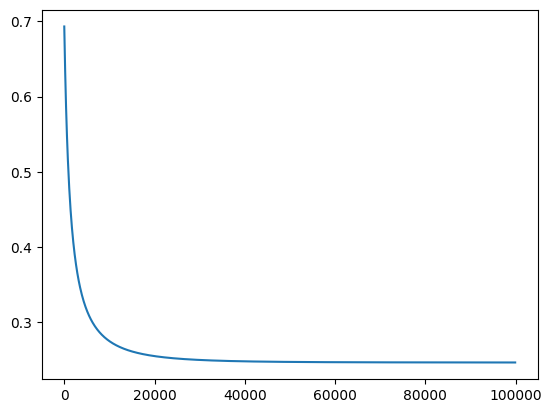

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/binary_classification_train.csv')
X = data[[f'Feature_{i}' for i in range(1, 21)]].values
y = data['Class']

def sigmoid(z):
    return 1 / (1 + np.exp(-z))



b_n = np.zeros(20)
b0 = 0

iterations = 1000
learning_rate = 1e-1

def normalize(X):
    return (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-8)

X = normalize(X)



def grad(b_n,b0, X, y):
    m = X.shape[0]


    z = np.dot(X, b_n) + b0
    A = sigmoid(z)
    cost = -np.mean(y * np.log(A) + (1 - y) * np.log(1 - A))

    Z = A - y
    dW = np.dot(X.T, Z) / m
    db = np.sum(Z) / m

    return  cost,dW, db

def accurate(b_n, b0, X, y):
    costs = []

    for i in range(iterations):
        cost, dW, db = grad(b_n, b0, X, y)

        b_n -= learning_rate * dW
        b0 -= learning_rate * db


        costs.append(cost)

    return b_n, b0, costs


b_n , b0 , costs = accurate(b_n, b0, X, y)

def predict(b_n, b0, X):

    z = np.dot(X, b_n) + b0

    A = sigmoid(z)
    return (A >= 0.5).astype(int)

y_pred = predict(b_n, b0, X)
accuracy = np.mean(y_pred == y) * 100
print(f"Accuracy= {accuracy}%")




TP = np.sum((y == 1) & (y_pred == 1))
FP = np.sum((y == 0) & (y_pred == 1))
TN = np.sum((y == 0) & (y_pred == 0))
FN = np.sum((y == 1) & (y_pred == 0))

precision = TP / (TP + FP) if (TP + FP) != 0 else 0
recall = TP / (TP + FN) if (TP + FN) != 0 else 0

f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

epsilon = 1e-10
y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


print(f'loss  =  {loss}')
print(f'f1 score = {f1}')
print(f'final cost = {costs[999]}')
plt.plot(range(0, len(costs) * 100, 100), costs)
plt.show()




**Multinomial classification**

Accuracy= 93.48125%
b0 = -1.3546959260131732
b1 = 0.010725731937970766
b2 = -0.022710251399105732
b3 = 0.013052035073978825
b4 = -0.7082444919218464
b5 = 0.004445791486933048
b6 = 1.6351701213843484
b7 = 0.02927562501679286
b8 = 0.01838218868797392
b9 = 0.30809923899177005
b10 = 0.031064430806355476
b11 = -0.04400251941978769
b12 = -0.01823015096533015
b13 = -0.02090881058874059
b14 = 0.39900059293465107
b15 = 0.6940003504770901
b16 = -0.5899898568405437
b17 = 0.8753298116274869
b18 = -0.5184171088505003
b19 = -0.1585483621146899
b20 = -0.0181480943301313
final cost = 0.6931471805599454


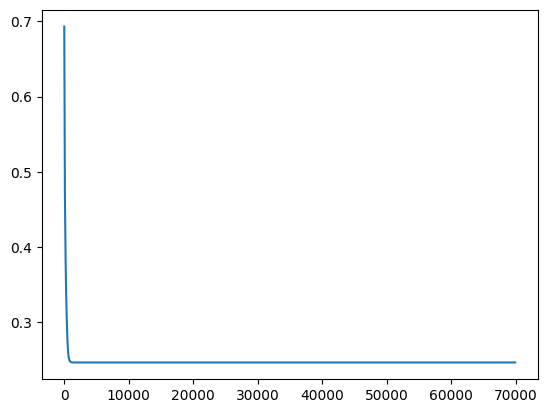

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/binary_classification_train.csv')
X = data[[f'Feature_{i}' for i in range(1, 21)]].values
y = data['Class']

def sigmoid(z):
    return 1 / (1 + np.exp(-z))



b_n = np.zeros(20)
b0 = 0

iterations = 700
learning_rate = 10

def normalize(X):
    return (X - X.mean(axis=0)) / (X.std(axis=0) + 1e-8)

X = normalize(X)



def grad(b_n,b0, X, y):
    m = X.shape[0]


    z = np.dot(X, b_n) + b0
    A = sigmoid(z)
    cost = -np.mean(y * np.log(A) + (1 - y) * np.log(1 - A))

    Z = A - y
    dW = np.dot(X.T, Z) / m
    db = np.sum(Z) / m

    return  cost,dW, db

def accurate(b_n, b0, X, y):
    costs = []

    for i in range(iterations):
        cost, dW, db = grad(b_n, b0, X, y)

        b_n -= learning_rate * dW
        b0 -= learning_rate * db


        costs.append(cost)

    return b_n, b0, costs


b_n , b0 , costs = accurate(b_n, b0, X, y)

def predict(b_n, b0, X):

    z = np.dot(X, b_n) + b0

    A = sigmoid(z)
    return (A >= 0.5).astype(int)

y_pred = predict(b_n, b0, X)
accuracy = np.mean(y_pred == y) * 100
print(f"Accuracy= {accuracy}%")

print(f'b0 = {b0}')
for i in range(20):
    print(f'b{i+1} = {b_n[i]}')

print(f'final cost = {costs[0]}')
plt.plot(range(0, len(costs) * 100, 100), costs)
plt.show()

final cost  = 3978.1255768746955


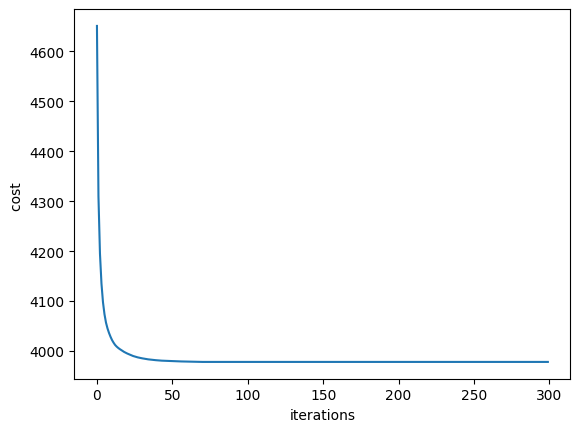

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('/content/drive/MyDrive/unsupervised_data (1).csv')

X = data.values
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)

X = (X - X_mean) / X_std#new X

def initialize(X, k):#random for better convergance
    np.random.seed(42)
    random_indices = np.random.permutation(X.shape[0])[:k]
    return X[random_indices]

def point_clusters(X, centroids):
    distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in centroids]).T

    return np.argmin(distances, axis=1)

def calculate_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])


def cost(X, centroids, labels):

    dev = 0.0
    for i in range(len(X)):
        centroid = centroids[labels[i]]
        dev += np.sum((X[i] - centroid) ** 2)
    return dev


def k_means(X, k, iterations=300):

    centroids = initialize(X, k)
    cost_fucntion=[]

    for iteration in range(iterations):
        labels = point_clusters(X, centroids)

        new_centroids = calculate_centroids(X, labels, k)
        cost_fucntion.append(cost(X, new_centroids, labels))



        centroids = new_centroids

    return centroids, labels,cost_fucntion

k = 500
iterations=300
centroids, labels,cost_fucntion = k_means(X, k,iterations)


print(f"final cost  = { cost_fucntion[-1]}")


plt.plot(range(len(cost_fucntion)),cost_fucntion)
plt.xlabel("iterations")
plt.ylabel("cost ")
plt.show()



**Multi Classification**

loss = 0.7487239394837725
Training Accuracy: 83.45%


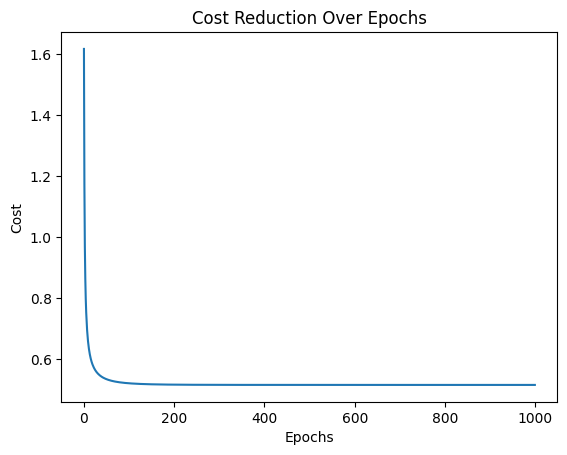

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/multi_classification_train.csv')
X = data[[f'Feature_{i}' for i in range(1, 21)]].values
y = data['Class']

num_features = X.shape[1]
num_samples = X.shape[0]
num_classes = len(np.unique(y))

# Normalize
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


y_onehot = np.zeros((num_samples, num_classes))
y_onehot[np.arange(num_samples), y] = 1


def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Cost
def compute_cost(A, Y):
    m = Y.shape[0]
    cost = -np.sum(Y * np.log(A + 1e-15)) / m  #To avoid log(0)
    return cost



def compute_gradients(X, A, Y):
    m = X.shape[0]
    dW = (1 / m) * np.dot(X.T, (A - Y))
    db = (1 / m) * np.sum(A - Y, axis=0, keepdims=True)
    return dW, db


W = np.random.randn(num_features, num_classes) * 0.01# tO keep them small initially
b = np.zeros((1, num_classes))

num_epochs = 1000
learning_rate = 0.7
costs = []

for epoch in range(num_epochs):
    # Forward Prop
    Z = np.dot(X, W) + b
    A = softmax(Z)

    cost = compute_cost(A, y_onehot)
    costs.append(cost)


    dW, db = compute_gradients(X, A, y_onehot)


    W -= learning_rate * dW
    b -= learning_rate * db

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Cost: {cost}")


def predict(X, W, b):
    Z = np.dot(X, W) + b
    A = softmax(Z)
    return np.argmax(A, axis=1)

y_pred = predict(X, W, b)

m = y.shape[0]


epsilon = 1e-8
y_pred_clipped = np.clip(y_pred, epsilon, 1 - epsilon)#tO avoid exact 0 or 1
loss = -np.sum(y * np.log(y_pred_clipped)) / m

print(f'epoch {j}:loss = {loss}')

accuracy = np.mean(y_pred == y) * 100
print(f"Training Accuracy: {accuracy:.2f}%")


plt.plot(costs)
plt.title("Cost Reduction Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.show()


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/multi_classification_train.csv')
data.head()

,ID,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_12,Feature_13,Feature_14,Feature_15,Feature_16,Feature_17,Feature_18,Feature_19,Feature_20,Class
0,1,-90.532634,-66.953472,79.261856,-111.800554,126.403549,111.509348,207.728953,-26.600556,-106.229324,...,148.391734,77.835738,-10.728207,1.100625,1.035362,-87.010809,-16.242297,-32.074925,-17.666026,1
1,2,-103.156720,-16.070400,87.819228,12.614599,51.347780,67.483725,40.269172,51.442254,-151.486693,...,29.009475,3.995786,-10.861630,-142.605726,-25.924592,-86.755351,-36.479749,-130.246619,-44.143652,2
2,3,24.326153,-92.098078,82.238354,-56.795879,85.203996,127.916504,-90.080307,-128.124071,18.036020,...,111.810098,65.826018,-101.271203,-44.127749,-7.131464,-105.049759,-130.948256,-43.113523,-37.330448,4
3,4,-64.631737,-83.703583,84.135072,-5.516152,74.338494,112.630556,181.576798,-1.054023,60.469865,...,50.047108,100.439101,-117.842955,150.239788,-144.635542,-144.306209,-69.272905,-79.629675,-51.334456,2
4,5,-55.473830,-78.853237,88.129107,75.200543,76.991520,60.224711,-13.106559,-146.773016,-33.490566,...,85.988282,23.381960,11.876102,-188.296503,-80.323929,-56.757987,-20.314172,-42.625170,-24.102753,2


Neural network

Epoch 0, Loss: 0.6916
Epoch 50, Loss: 0.6640
Epoch 100, Loss: 0.6440
Epoch 150, Loss: 0.6345
Epoch 200, Loss: 0.6474
Epoch 250, Loss: 0.6357
Epoch 300, Loss: 0.6730
Epoch 350, Loss: 0.6343
Epoch 400, Loss: 0.6433
Epoch 450, Loss: 0.6573
Epoch 500, Loss: 0.6308


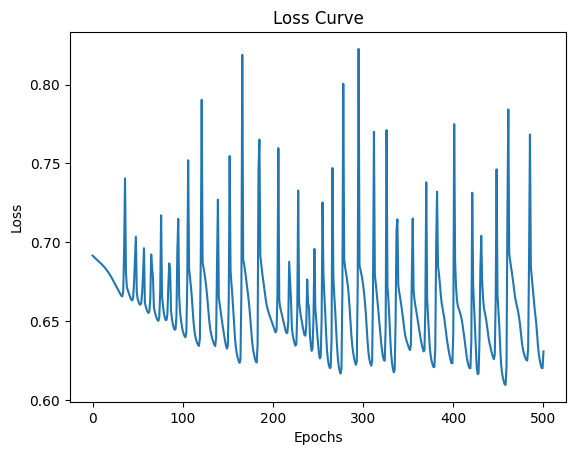

Training Accuracy: 59.02%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('/content/drive/MyDrive/nn_train.csv')
X = data[[f'Feature_{i}' for i in range(1, 1025)]].values
y = data['binary_label'].values.reshape(80000, 1)


input_size = X.shape[1]
output_size = 1 #1/0
hidden_layer = [64, 32]  #layer and then how many in respective layer
learning_rate = 0.01
epochs = 500

# Initialize weights and biases
layers = [input_size] + hidden_layer + [output_size]#layers is added that too order wise
weights = []
biases = []
#this is for faster convergance
for i in range(len(layers) - 1):
    weights.append(np.random.randn(layers[i + 1], layers[i]) * 0.01)#0.01 so that they are small but different
    biases.append(np.zeros((layers[i + 1], 1)))
# Activation functions
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

#smart approach
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return (Z > 0).astype(float)

# Forward propagation
def forward_propagation(X, weights, biases):
    activations = [X.T]  # Store activations of each layer this X.T is the first element or say A1
    Z_values = []

    for i in range(len(weights) - 1):    #len(weights) - 1 this is done becausse of indexing total numberis the same
        Z = np.dot(weights[i], activations[-1]) + biases[i]
        A = relu(Z)
        Z_values.append(Z)
        activations.append(A)

    # Output layer
    Z = np.dot(weights[-1], activations[-1]) + biases[-1]  #this tells the latest without chances of error in indexing
    A = sigmoid(Z)
    Z_values.append(Z) #final z
    activations.append(A) #final A

    return activations, Z_values

# Compute binary cross-entropy loss
def compute_loss(A, y):
    A_clipped = np.clip(A, 1e-10, 1 - 1e-10)  # Avoid log(0)
    cost = -np.mean(y * np.log(A_clipped.T) + (1 - y) * np.log(1 - A_clipped.T)) #this cost is cross cost for binary outputs single neuron and transpose is done so that it multiplies
    return cost

# Backward propagation
def backward_propagation(X, y, activations, Z_values, weights):
    grad_W = []#inke starting mai hai output wale not anymore
    grad_b = []#inke starting mai hai output wale
    m = X.shape[0]

    # Output layer gradients
    dA = activations[-1] - y.T
    dZ = dA#always for last layer

    dW = np.dot(dZ, activations[-2].T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m

    grad_W.append(dW)
    grad_b.append(db)

    # Hidden layers gradients
    for i in range(len(weights) - 2, -1, -1):
        dA = np.dot(weights[i + 1].T, dZ)
        dZ = dA * relu_derivative(Z_values[i])



        dW = np.dot(dZ, activations[i].T) / m
        db = np.sum(dZ, axis=1, keepdims=True) / m

        grad_W.insert(0, dW)
        grad_b.insert(0, db)#by this the biases will be in order

    return grad_W, grad_b


def update_parameters(weights, biases, grads_W, grads_b, learning_rate):
    for i in range(len(weights)):
        weights[i] -= learning_rate * grads_W[i]
        biases[i] -= learning_rate * grads_b[i]
    return weights, biases

# Train
losses = []
for j in range(epochs+1):

    activations, Z_values = forward_propagation(X, weights, biases)


    loss = compute_loss(activations[-1], y)
    losses.append(loss)


    grads_W, grads_b = backward_propagation(X, y, activations, Z_values, weights)

    weights, biases = update_parameters(weights, biases, grads_W, grads_b, learning_rate)

    if j % 50 == 0:
        print(f"Epoch {j}, Loss: {loss:.4f}")


plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()

def predict(X, weights, biases):
    activations, _ = forward_propagation(X, weights, biases)
    predictions = (activations[-1] > 0.5).astype(int)
    return predictions


y_pred = predict(X, weights, biases)
accuracy = np.mean(y_pred.flatten() == y.flatten()) * 100
print(f"Training Accuracy: {accuracy:.2f}%")




**NOw for multiple  class**

class label neural network

Epoch 0, Loss: 2.3979
Epoch 100, Loss: 2.3551
Epoch 200, Loss: 2.2389
Epoch 300, Loss: 2.0929
Epoch 400, Loss: 1.9934
Epoch 500, Loss: 1.9191
Epoch 600, Loss: 1.8383
Epoch 700, Loss: 1.7656
Epoch 800, Loss: 1.7018
Epoch 900, Loss: 1.6476
Epoch 1000, Loss: 1.5994


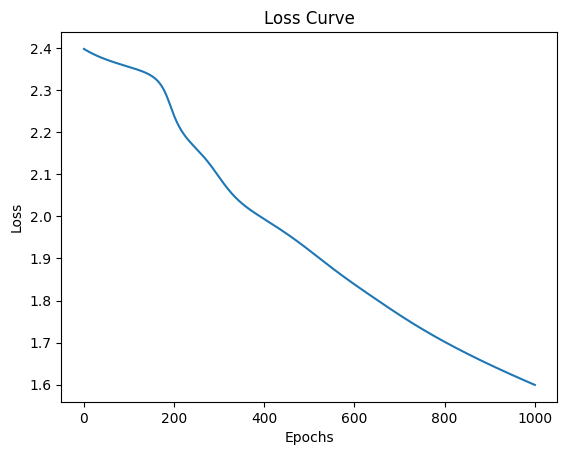

Training Accuracy: 44.44%


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('/content/drive/MyDrive/nn_train.csv')
X = data[[f'Feature_{i}' for i in range(1, 1025)]].values
y = data['class_label'].values

X_mean = X.mean(axis=0)
X_std = X.std(axis=0) + 1e-8
X = (X - X_mean) / X_std




num_classes = 11
y_onehot = np.zeros((y.size, 11))
y_onehot[np.arange(y.size), y] = 1


input_size = 1024
hidden_layer = [128, 64]
output_size = 11


layers = [input_size] + hidden_layer + [output_size]
weights = []
biases = []

#initializatoin
for i in range(len(layers) - 1):#if 10 layer then 9 weights and biases
    weights.append(np.random.randn(layers[i + 1], layers[i]) * 0.01)
    biases.append(np.zeros((layers[i + 1], 1)))


def relu(Z):
    return np.maximum(0, Z)

def softmax(Z):#prob wala to know the max in multi
    exp_values = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_values / np.sum(exp_values, axis=0, keepdims=True)


def forward_propagation(X, weights, biases):
    activations = [X.T]  # Starting likeA1
    for i in range(len(weights) - 1):
        Z = np.dot(weights[i], activations[-1]) + biases[i]
        A = relu(Z)
        activations.append(A)
    Z_output = np.dot(weights[-1], activations[-1]) + biases[-1]  # Final layer
    A_output = softmax(Z_output)
    activations.append(A_output)
    return activations

# calculate_entropy loss
def compute_loss(A, y_onehot):
    m = y_onehot.shape[0]
    cost = -np.mean(np.sum(y_onehot * np.log(A.T), axis=1))  # Categorical cross-entropy
    return cost

def backward_propagation(X, y_onehot, activations, weights, biases):
    m = X.shape[0]
    grads_W = []
    grads_b = []


    dA = activations[-1] - y_onehot.T  #softmax derivative

    # Backprop
    for i in range(len(weights) - 1, -1, -1):

        dZ = dA * (activations[i + 1] > 0).astype(float) if i != len(weights) - 1 else dA

        dW = np.dot(dZ, activations[i].T) / m

        db = np.sum(dZ, axis=1, keepdims=True) / m


        grads_W.insert(0, dW)
        grads_b.insert(0, db)


        dA = np.dot(weights[i].T, dZ)

    return grads_W, grads_b

def update_parameters(weights, biases, grads_W, grads_b, learning_rate):
    for i in range(len(weights)):

        weights[i] -= learning_rate * grads_W[i]

        biases[i] -= learning_rate * grads_b[i]
    return weights, biases


learning_rate = 0.07
epochs = 1000
losses = []

for epoch in range(epochs+1):

    activations = forward_propagation(X, weights, biases)


    loss = compute_loss(activations[-1], y_onehot)
    losses.append(loss)


    grads_W, grads_b = backward_propagation(X, y_onehot, activations, weights, biases)

    weights, biases = update_parameters(weights, biases, grads_W, grads_b, learning_rate)


    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.2f}")

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.show()


def predict(X, weights, biases):
    activations = forward_propagation(X, weights, biases)
    predictions = np.argmax(activations[-1], axis=0)
    return predictions

y_pred = predict(X, weights, biases)
accuracy = np.mean(y_pred == np.argmax(y_onehot, axis=1)) * 100
print(f"Training Accuracy: {accuracy:.2f}%")


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/multi_classification_train.csv')
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Labels

m = y.shape[0]

def distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

def knn_predict(X, y, X_test, k=5):
    predictions = []
    for testp in X_test:
        distances = distance(X, testp)
        k_index = distances.argsort()[:k]
        k_neighbor =y[k_index]
        predictions.append( np.bincount(k_neighbor).argmax())
    return np.array(predictions)

k = 5#we can change this but as we know there are 5 classes ,it would show best result at k=5
y_pred = knn_predict(X, y, X, k)

def compute_loss(y_onehot, y_pred):
    epsilon = 1e-10
    y_pred_onehot = np.zeros_like(y_onehot)
    y_pred_onehot[np.arange(len(y_pred)), y_pred] = 1
    y_pred_proba = np.clip(y_pred_onehot, epsilon, 1 - epsilon)
    loss = -np.sum(y_onehot * np.log(y_pred_proba)) / y_onehot.shape[0]
    return loss

loss = compute_loss(y_onehot, y_pred)
print(f"Loss: {loss:.4f}")


accuracy = np.mean(y_pred == y)
print(f"KNN Accuracy: {accuracy * 100:.2f}%")



Loss: 3.6028
KNN Accuracy: 89.57%
